In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

In [63]:
# Read the X from the csv file
dataFrame = pd.read_csv('./dataGenerator/linearSeperableData.csv', header=None)
dataFrame.columns = ['x1', 'x2', 'y']
print(dataFrame.head())

# convert the dataFrame to numpy array
X = np.array(dataFrame[['x1', 'x2']])
ones_column = np.ones((X.shape[0], 1))
X_with_ones = np.hstack((X, ones_column))
X = X_with_ones
Y = np.array(dataFrame['y'])

          x1         x2  y
0 -34.918049  48.724088  1
1  34.950736  45.649678 -1
2  92.592813  60.604192 -1
3 -73.283518  75.944047  1
4  15.708536  65.582330 -1


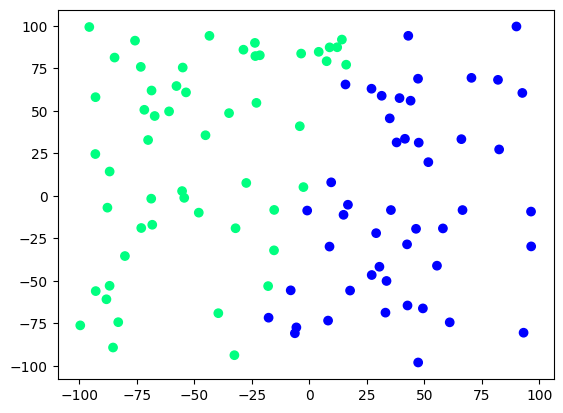

In [64]:
# ploting the X
plt.scatter(X[:,0], X[:,1], c=Y, cmap='winter')
plt.show()

In [65]:
# Perceptron Learning Algorithm (PLA) for Linear Seperable X

numFeatures = 2
weights = np.zeros(numFeatures+1)
learningRate = 0.2
print("Dimension of weights: ", weights.shape)
print("Dimension of X[0]: ", X.shape)
print("Dimension of Y[0]: ", Y.shape)
done = False
maxIterations = 20000000000000
error = []

while not done and maxIterations > 0:
    done = True
    err = 0
    for i in range(len(X)):
        y_pred = np.sign(np.dot(X[i], weights))
        if y_pred != Y[i]:
            weights += learningRate*(Y[i]-y_pred) * X[i]
            done = False
            err += 1
    error.append(err/len(X))

    maxIterations -= 1

print("Weights: ", weights)
print("Error: ", error)

Dimension of weights:  (3,)
Dimension of X[0]:  (100, 3)
Dimension of Y[0]:  (100,)
Weights:  [-247.7016849    59.05210905 -163.        ]
Error:  [0.11, 0.07, 0.05, 0.05, 0.04, 0.03, 0.02, 0.02, 0.02, 0.04, 0.03, 0.02, 0.02, 0.02, 0.02, 0.02, 0.04, 0.03, 0.02, 0.02, 0.02, 0.02, 0.02, 0.04, 0.03, 0.02, 0.02, 0.02, 0.04, 0.03, 0.02, 0.02, 0.02, 0.02, 0.04, 0.03, 0.02, 0.02, 0.02, 0.04, 0.03, 0.02, 0.02, 0.02, 0.04, 0.03, 0.02, 0.02, 0.02, 0.02, 0.03, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.03, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.03, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.03, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.03, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.03, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.03, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.03, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.03, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.03, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.03, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.03, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.03, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.03, 0

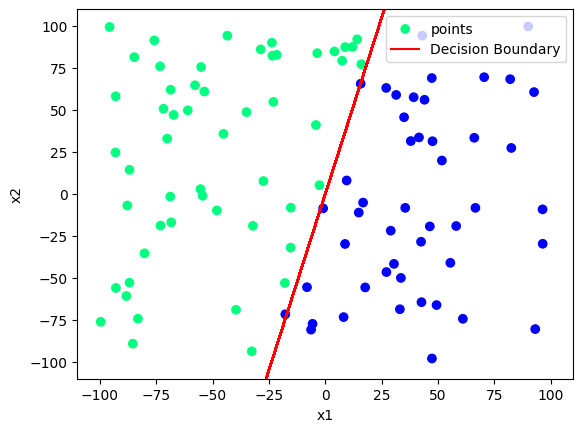

In [66]:
# plot data with linear seperator using weights
y_pred = []
for i in range(len(X)):
    y_pred.append(0 if np.sign(np.dot(X[i], weights)) == 1 else 1)

plt.scatter(X[:,0], X[:,1], c=Y, cmap='winter')
plt.plot(X[:,0], (-weights[0]/weights[1])*X[:,0], 'r-')
plt.xlim(-110, 110)
plt.ylim(-110, 110)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(['points', 'Decision Boundary'])
plt.show()

Text(0, 0.5, 'Fraction Misclassified')

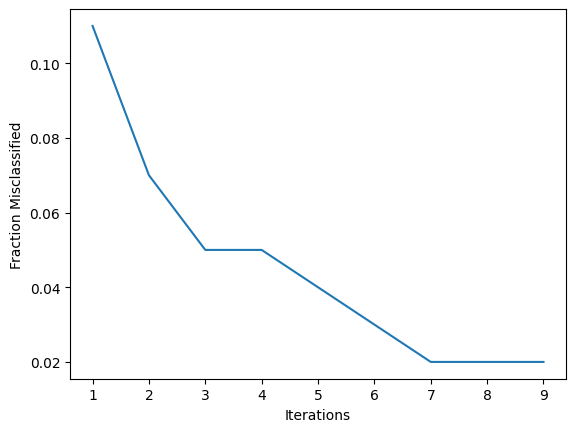

In [67]:
# Error plot for certain number of iterations
plt.plot(range(1, 10), error[0:9])
plt.xlabel('Iterations')
plt.ylabel('Fraction Misclassified')